### NOTEBOOK IMPORTS AND PACKAGES

In [57]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Cost Function

$f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [15]:
# make data
x_1 = np.linspace(start=-3, stop=3, num=500)

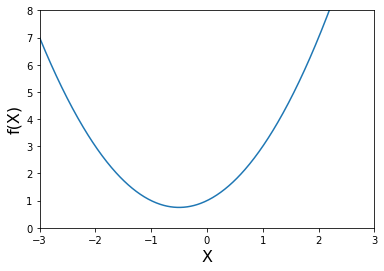

In [10]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

### Slope & Derivatives

In [16]:
def df(x):
    return 2*x + 1

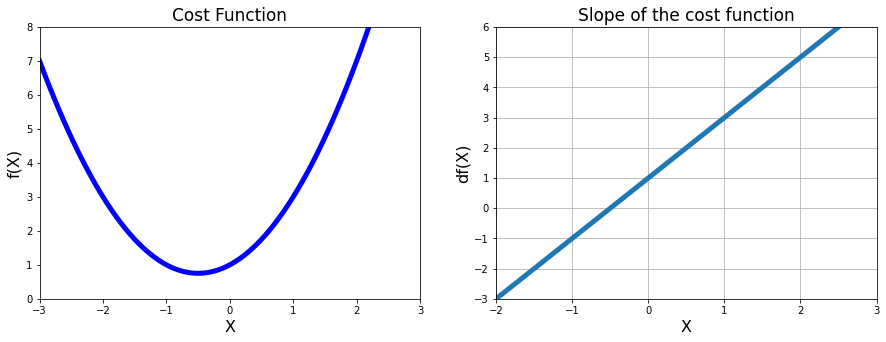

In [26]:
# Plot functiin and derivative side by side
plt.figure(figsize=[15,5])

# 1 chart
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=5)

# 2 chart
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),linewidth=5)

plt.show()

In [54]:
# Gradient Descent

new_x = 3
prev_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    
    step_size = abs(new_x - prev_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print(n)
        break
        
print('Local Minimum Occurs At: ', new_x)
print("Slope: ", df(new_x))
print('f(x) value or cost at this point is :', f(new_x))

50
Local Minimum Occurs At:  -0.49996003706460423
Slope:  7.992587079153068e-05
f(x) value or cost at this point is : 0.7500000015970362


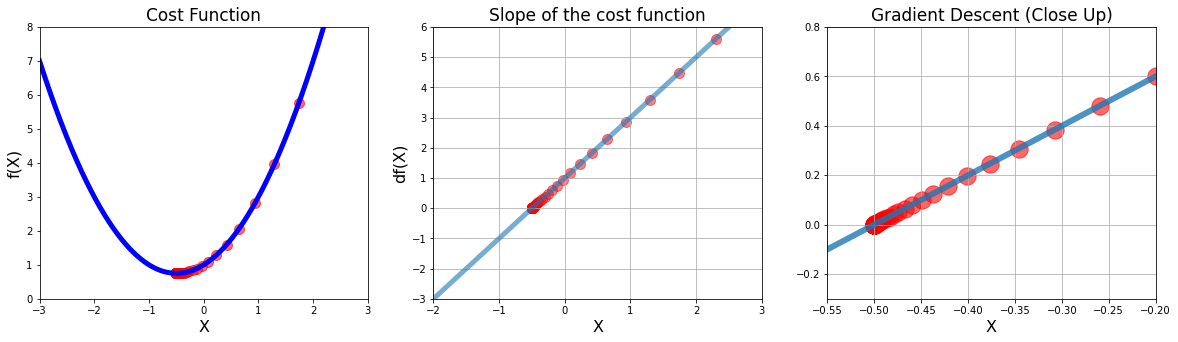

In [55]:
# Super Impose GD Calculation
plt.figure(figsize=[20,5])

# 1 chart
plt.subplot(1,3,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=5)

values = np.array(x_list)
plt.scatter(x_list, f(values),color='red',s=100,alpha=0.6)

# 2 chart
plt.subplot(1,3,2)

plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),linewidth=5,alpha=0.6)
plt.scatter(x_list, slope_list,color='red',s=100,alpha=0.5)

# chart 2 close up
plt.subplot(1,3,3)

plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.title('Gradient Descent (Close Up)',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),linewidth=6,alpha=0.8)
plt.scatter(x_list, slope_list,color='red',s=300,alpha=0.6)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advance Functions

## $$g(x) = x^4 + 4x^2 + 5$$

In [62]:
# Make some data

x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x 



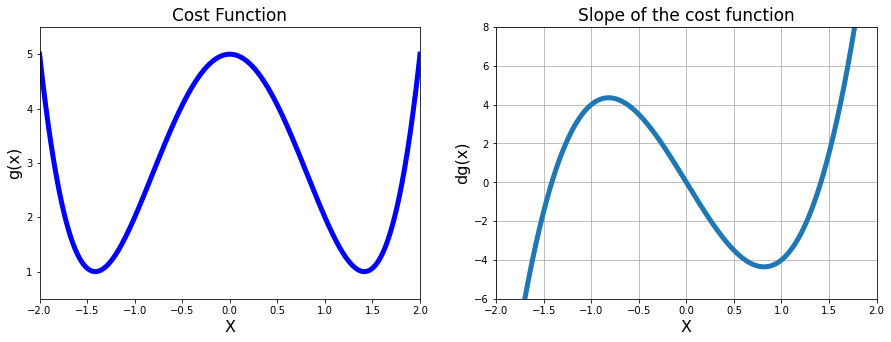

In [63]:
# Plot functiin and derivative side by side
plt.figure(figsize=[15,5])

# 1 chart
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=5)

# 2 chart
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [113]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter = 300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - multiplier * gradient

        step_size = abs(new_x - prev_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [97]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


In [95]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.5)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


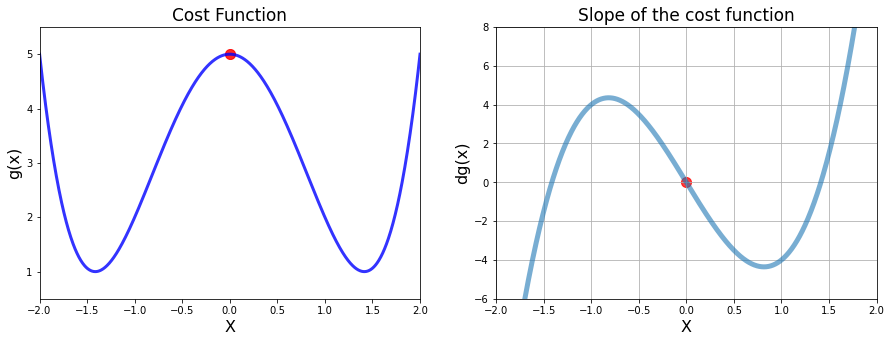

In [105]:
#Calling gradient function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)
# Plot functiin and derivative side by side
plt.figure(figsize=[15,5])

# 1 chart
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 chart
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.plot(x_2,dg(x_2),linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2 $$

In [107]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

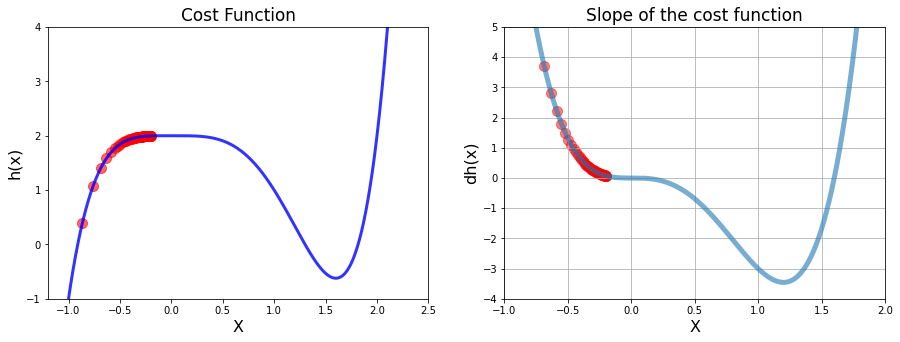

Local min accurs at: -1.8398461123332792e+24
Cost at this min: -2.1081790694225687e+121
Number of steps: 72


In [118]:
#Calling gradient function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=71)
# Plot functiin and derivative side by side
plt.figure(figsize=[15,5])

# 1 chart
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('h(x)',fontsize=16)

plt.plot(x_3,h(x_3),color='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 chart
plt.subplot(1,2,2)

plt.xlim([-1,2])
plt.ylim([-4,5])
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.grid()

plt.plot(x_3,dh(x_3),linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min accurs at:', local_min)
print('Cost at this min:', h(local_min))
print('Number of steps:', len(list_x))